# Finding app events per timeunit
The purpose of this notebook is to find meaningful features based on the type of apps active on devices in the evening, night, morning and afternoon.

I would expect that people of working age have bigger difference in app usage during the day and in the evening/night.

It only makes sense to look at apps that are active. I do not expect apps to be installed/uninstalled to change during the day.

Challenge is that only for some devices events during all four periods are measured and that the number of events differs strongly per period of the day.

So we could first look at any differences between the four periods.

More specifically:
- are specifi

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dir_in = './data/events_per_timeunit/'

## Comparison day/evening
Load all previously aggregated data.

In [46]:
# Load data and make timestamp is a datetime type
df1 = pd.read_csv(dir_in + 'app_group_per_device_active_night.csv', index_col='device_id')
df2 = pd.read_csv(dir_in + 'app_group_per_device_active_morning.csv', index_col='device_id')
df3 = pd.read_csv(dir_in + 'app_group_per_device_active_afternoon.csv', index_col='device_id')
df4 = pd.read_csv(dir_in + 'app_group_per_device_active_evening.csv', index_col='device_id')
day = df2.add(df3, fill_value=0)
night = df4.add(df1, fill_value=0)
diff = day.sub(night, fill_value=0)

In [47]:
diff.head()

,is_installed,is_active,app_cat_sa_Custom,app_cat_sa_Education,app_cat_sa_Family,app_cat_sa_Finance,app_cat_sa_Fun,app_cat_sa_Games,app_cat_sa_Industry tag,app_cat_sa_Music,...,app_cat_sa_Productivity,app_cat_sa_Property,app_cat_sa_Religion,app_cat_sa_Services,app_cat_sa_Shopping,app_cat_sa_Sports,app_cat_sa_Tencent,app_cat_sa_Travel,app_cat_sa_Video,app_cat_sa_Vitality
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,318.0,318.0,52.0,7.0,5.0,77.0,11.0,7.0,91.0,0.0,...,8.0,46.0,50.0,17.0,0.0,0.0,0.0,1.0,0.0,0.0
-9222661944218806987,-46.0,-46.0,-3.0,0.0,-7.0,-2.0,-13.0,-1.0,-35.0,-5.0,...,-2.0,-35.0,-2.0,-13.0,-5.0,0.0,-1.0,0.0,0.0,-7.0
-9222399302879214035,4.0,4.0,1.0,-1.0,-1.0,1.0,-1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
-9221825537663503111,194.0,194.0,10.0,0.0,25.0,23.0,31.0,8.0,92.0,0.0,...,0.0,86.0,9.0,36.0,5.0,0.0,1.0,1.0,21.0,5.0
-9221767098072603291,15.0,15.0,8.0,5.0,6.0,6.0,6.0,4.0,22.0,0.0,...,4.0,22.0,6.0,5.0,3.0,0.0,2.0,0.0,0.0,3.0


In [48]:
diff.shape

(60669, 21)

In [49]:
# Load genders and merge sets
train = pd.read_csv('./data_ori/' + 'gender_age_train.csv', index_col='device_id')
def age_group(sex, age):
    # Convert age column to age group
    #ageGroupsF = ['23-','24-26','27-28','29-32','33-42,''43+']
    #ageGroupsM = ['22-','23-26','27-28','29-31','32-38,''39+']

    if sex not in ['M','F']:
        ValueError('%s is not a valid gender' % sex)
        
    if age not in range(100):
        ValueError('%s is not a valid age' % age)
    
    if sex=="M":
        if age<=22:
            g = 0
        elif age<=26:
            g = 1
        elif age<=28:
            g = 2
        elif age<=31:
            g = 3
        elif age<=38:
            g = 4
        else:
            g = 5
    elif sex=="F":
        if age<=23:
            g = 0
        elif age<=26:
            g = 1
        elif age<=28:
            g = 2
        elif age<=32:
            g = 3
        elif age<=42:
            g = 4
        else:
            g = 5
    
    return g
train['age_group'] = train[['gender','age']].apply(lambda x: age_group(x[0],x[1]), axis=1)
train.drop(['age','group'], axis=1, inplace=True)

In [50]:
df1.index.nunique()

26808

In [51]:
df1 = df1.merge(train, how='left', left_index=True, right_index=True)

In [52]:
df1.index.nunique()

26808

In [53]:
diff = train.merge(diff, how='inner', left_index=True, right_index=True)

In [54]:
sum_gender = diff.groupby('gender').mean()
sum_gender.head()

,age_group,is_installed,is_active,app_cat_sa_Custom,app_cat_sa_Education,app_cat_sa_Family,app_cat_sa_Finance,app_cat_sa_Fun,app_cat_sa_Games,app_cat_sa_Industry tag,...,app_cat_sa_Productivity,app_cat_sa_Property,app_cat_sa_Religion,app_cat_sa_Services,app_cat_sa_Shopping,app_cat_sa_Sports,app_cat_sa_Tencent,app_cat_sa_Travel,app_cat_sa_Video,app_cat_sa_Vitality
gender,,,,,,,,,,,,,,,,,,,,,
F,2.65225,32.956001,32.956001,2.616228,0.987037,1.981553,3.060451,2.831484,0.530973,10.205285,...,0.952387,9.776268,2.124766,3.513773,1.135735,0.003241,0.228344,0.784245,0.661224,1.003365
M,2.78396,33.115738,33.115738,2.701524,0.827969,1.535405,3.372438,2.004335,0.479440,8.998489,...,0.942853,8.545652,2.401340,3.346886,0.813781,-0.000131,0.161718,0.834538,0.511101,0.730032


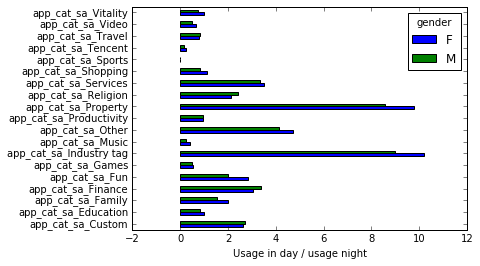

In [55]:
sum_gender[sum_gender.columns[3:]].T.plot(kind='barh')
plt.xlabel('Usage in day / usage night')

In [56]:
(sum_gender.loc['F']/sum_gender.loc['M']).sort_values(ascending=False)

app_cat_sa_Music            1.546463
app_cat_sa_Fun              1.412680
app_cat_sa_Tencent          1.411983
app_cat_sa_Shopping         1.395627
app_cat_sa_Vitality         1.374414
app_cat_sa_Video            1.293725
app_cat_sa_Family           1.290574
app_cat_sa_Education        1.192119
app_cat_sa_Property         1.144005
app_cat_sa_Other            1.137912
app_cat_sa_Industry tag     1.134111
app_cat_sa_Games            1.107486
app_cat_sa_Services         1.049863
app_cat_sa_Productivity     1.010111
is_installed                0.995176
is_active                   0.995176
app_cat_sa_Custom           0.968427
age_group                   0.952690
app_cat_sa_Travel           0.939736
app_cat_sa_Finance          0.907489
app_cat_sa_Religion         0.884825
app_cat_sa_Sports         -24.668079
dtype: float64

In [65]:
sum_age = diff.groupby('age_group').mean()
sum_age = (sum_age+1)
sum_age.head()

,is_installed,is_active,app_cat_sa_Custom,app_cat_sa_Education,app_cat_sa_Family,app_cat_sa_Finance,app_cat_sa_Fun,app_cat_sa_Games,app_cat_sa_Industry tag,app_cat_sa_Music,...,app_cat_sa_Property,app_cat_sa_Religion,app_cat_sa_Services,app_cat_sa_Shopping,app_cat_sa_Sports,app_cat_sa_Tencent,app_cat_sa_Travel,app_cat_sa_Video,app_cat_sa_Vitality,sum_diff
age_group,,,,,,,,,,,,,,,,,,,,,
0,20.238650,20.238650,2.345706,1.515951,2.340184,2.567178,2.872086,1.311350,7.092025,1.309816,...,7.018712,2.008589,3.009202,1.728221,1.007975,1.159509,1.345092,1.474847,1.534663,67.784049
1,25.257048,25.257048,2.884931,1.624808,2.465915,2.977704,2.900564,1.370323,8.286776,1.321630,...,8.159918,2.514608,3.482317,1.795746,0.994106,1.163506,1.540748,1.469503,1.664787,83.493593
2,28.452716,28.452716,3.234713,1.733004,2.667300,3.671857,3.213445,1.476643,9.455374,1.361565,...,9.213065,2.846563,4.030763,1.862514,1.004937,1.186859,1.695025,1.568933,1.812381,95.833650
3,32.729019,32.729019,3.597474,1.936069,2.777953,4.022626,3.317022,1.484609,10.445672,1.299658,...,10.106025,3.205735,4.395422,1.983425,1.004999,1.206262,1.852670,1.609840,1.811365,108.887661
4,41.377421,41.377421,4.124129,2.054996,2.753679,4.920798,3.383230,1.569713,11.535050,1.274981,...,10.950813,3.775174,4.874516,1.987994,0.993610,1.195391,2.050155,1.562742,1.944036,131.617738


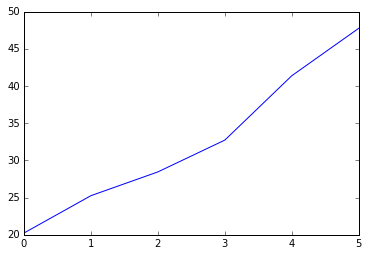

In [66]:
plt.plot(sum_age.index, sum_age.is_installed)

In [67]:
(sum_age.loc[4] - sum_age.loc[0]).sort_values(ascending=True).head(50)

app_cat_sa_Music           -0.034835
app_cat_sa_Sports          -0.014366
app_cat_sa_Tencent          0.035882
app_cat_sa_Video            0.087895
app_cat_sa_Games            0.258364
app_cat_sa_Shopping         0.259773
app_cat_sa_Vitality         0.409373
app_cat_sa_Family           0.413495
app_cat_sa_Fun              0.511144
app_cat_sa_Education        0.539045
app_cat_sa_Productivity     0.545097
app_cat_sa_Travel           0.705063
app_cat_sa_Other            1.701149
app_cat_sa_Religion         1.766585
app_cat_sa_Custom           1.778423
app_cat_sa_Services         1.865313
app_cat_sa_Finance          2.353620
app_cat_sa_Property         3.932102
app_cat_sa_Industry tag     4.443026
is_installed               21.138770
is_active                  21.138770
sum_diff                   63.833689
dtype: float64

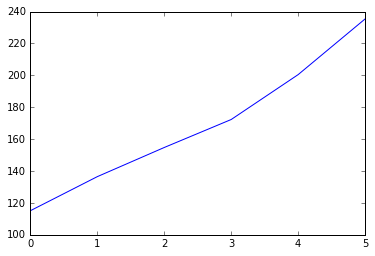

In [68]:
plt.plot(sum_age.index, sum_age[sum_age.columns[2:]].sum(axis=1))

In [69]:
diff.head()

,gender,age_group,is_installed,is_active,app_cat_sa_Custom,app_cat_sa_Education,app_cat_sa_Family,app_cat_sa_Finance,app_cat_sa_Fun,app_cat_sa_Games,...,app_cat_sa_Property,app_cat_sa_Religion,app_cat_sa_Services,app_cat_sa_Shopping,app_cat_sa_Sports,app_cat_sa_Tencent,app_cat_sa_Travel,app_cat_sa_Video,app_cat_sa_Vitality,sum_diff
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,M,4,318.0,318.0,52.0,7.0,5.0,77.0,11.0,7.0,...,46.0,50.0,17.0,0.0,0.0,0.0,1.0,0.0,0.0,1024.0
-9221026417907250887,F,3,186.0,186.0,14.0,11.0,19.0,8.0,30.0,0.0,...,66.0,8.0,14.0,16.0,0.0,0.0,9.0,1.0,19.0,691.0
-9220830859283101130,M,0,-31.0,-31.0,0.0,-4.0,0.0,0.0,-1.0,0.0,...,-15.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-107.0
-9220061629197656378,M,5,36.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0
-9218960997324667698,F,5,-18.0,-18.0,0.0,3.0,0.0,-1.0,-1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,-2.0,1.0,-33.0


In [70]:
diff['sum_diff'] = diff[diff.columns[2:]].sum(axis=1)

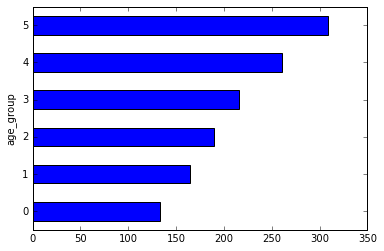

In [71]:
diff.groupby('age_group').sum_diff.mean().plot(kind='barh')

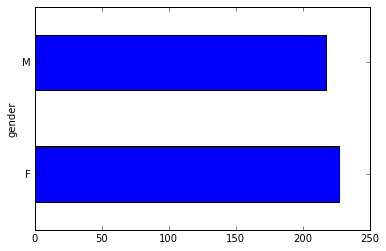

In [72]:
diff.groupby('gender').sum_diff.mean().plot(kind='barh')

## Comparison weekend/weekdays

In [73]:
# Load data and make timestamp is a datetime type
df1 = pd.read_csv(dir_in + 'app_group_per_device_active_weekdays.csv', index_col='device_id')
df2 = pd.read_csv(dir_in + 'app_group_per_device_active_weekends.csv', index_col='device_id')
diff = df1.sub(df2, fill_value=0)

In [74]:
diff.head()

,is_installed,is_active,app_cat_sa_Custom,app_cat_sa_Education,app_cat_sa_Family,app_cat_sa_Finance,app_cat_sa_Fun,app_cat_sa_Games,app_cat_sa_Industry tag,app_cat_sa_Music,...,app_cat_sa_Productivity,app_cat_sa_Property,app_cat_sa_Religion,app_cat_sa_Services,app_cat_sa_Shopping,app_cat_sa_Sports,app_cat_sa_Tencent,app_cat_sa_Travel,app_cat_sa_Video,app_cat_sa_Vitality
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,-126.0,-126.0,-9.0,0.0,0.0,-6.0,0.0,-1.0,-6.0,0.0,...,0.0,-5.0,-9.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0
-9222661944218806987,14.0,14.0,-1.0,0.0,3.0,0.0,5.0,-1.0,17.0,3.0,...,1.0,17.0,0.0,7.0,4.0,0.0,-1.0,0.0,0.0,4.0
-9222399302879214035,20.0,20.0,4.0,1.0,1.0,4.0,1.0,0.0,2.0,0.0,...,0.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
-9221825537663503111,122.0,122.0,2.0,0.0,7.0,7.0,10.0,2.0,27.0,0.0,...,0.0,26.0,3.0,15.0,0.0,0.0,-1.0,1.0,7.0,0.0
-9221767098072603291,35.0,35.0,3.0,2.0,6.0,4.0,6.0,2.0,27.0,2.0,...,3.0,27.0,4.0,9.0,4.0,0.0,-1.0,0.0,2.0,9.0


In [75]:
diff = train.merge(diff, how='inner', left_index=True, right_index=True)

In [76]:
diff.head()

,gender,age_group,is_installed,is_active,app_cat_sa_Custom,app_cat_sa_Education,app_cat_sa_Family,app_cat_sa_Finance,app_cat_sa_Fun,app_cat_sa_Games,...,app_cat_sa_Productivity,app_cat_sa_Property,app_cat_sa_Religion,app_cat_sa_Services,app_cat_sa_Shopping,app_cat_sa_Sports,app_cat_sa_Tencent,app_cat_sa_Travel,app_cat_sa_Video,app_cat_sa_Vitality
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,M,4,-126.0,-126.0,-9.0,0.0,0.0,-6.0,0.0,-1.0,...,0.0,-5.0,-9.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0
-9221026417907250887,F,3,172.0,172.0,7.0,4.0,13.0,4.0,19.0,0.0,...,12.0,45.0,4.0,13.0,7.0,0.0,0.0,6.0,1.0,10.0
-9220830859283101130,M,0,19.0,19.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
-9220061629197656378,M,5,44.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9218960997324667698,F,5,8.0,8.0,6.0,5.0,2.0,9.0,3.0,2.0,...,1.0,13.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0


In [77]:
diff['sum_diff'] = diff[diff.columns[2:]].sum(axis=1)
print diff['sum_diff'].head()

device_id
-9222956879900151005   -293.0
-9221026417907250887    549.0
-9220830859283101130     59.0
-9220061629197656378    116.0
-9218960997324667698     93.0
Name: sum_diff, dtype: float64


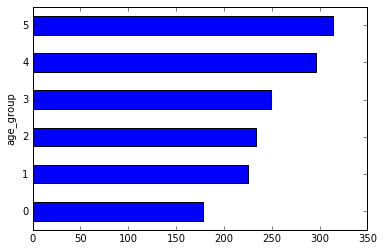

In [78]:
diff.groupby('age_group').sum_diff.mean().plot(kind='barh')

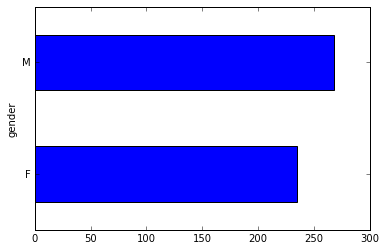

In [79]:
diff.groupby('gender').sum_diff.mean().plot(kind='barh')

In [83]:
diff.groupby('gender').mean().head()

,age_group,is_installed,is_active,app_cat_sa_Custom,app_cat_sa_Education,app_cat_sa_Family,app_cat_sa_Finance,app_cat_sa_Fun,app_cat_sa_Games,app_cat_sa_Industry tag,...,app_cat_sa_Property,app_cat_sa_Religion,app_cat_sa_Services,app_cat_sa_Shopping,app_cat_sa_Sports,app_cat_sa_Tencent,app_cat_sa_Travel,app_cat_sa_Video,app_cat_sa_Vitality,sum_diff
gender,,,,,,,,,,,,,,,,,,,,,
F,2.65225,82.71320,82.71320,3.756824,1.504923,2.800324,4.337654,4.091612,0.850679,14.837093,...,14.305123,2.985043,4.999626,1.620342,0.007229,0.397981,1.055964,1.132369,1.493830,234.757073
M,2.78396,98.50381,98.50381,4.424790,1.378416,2.549396,5.609892,3.437401,0.916251,15.011035,...,14.314963,3.907843,5.372044,1.327641,0.036456,0.313452,1.224251,1.088939,1.210786,268.303534


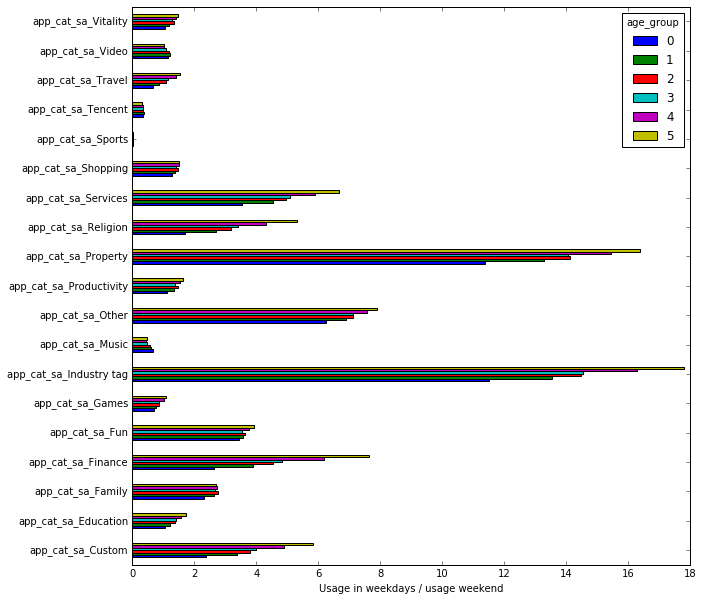

In [86]:
diff.groupby('age_group').mean()[sum_gender.columns[3:]].T.plot(kind='barh', figsize=(10,10))
plt.xlabel('Usage in weekdays / usage weekend')

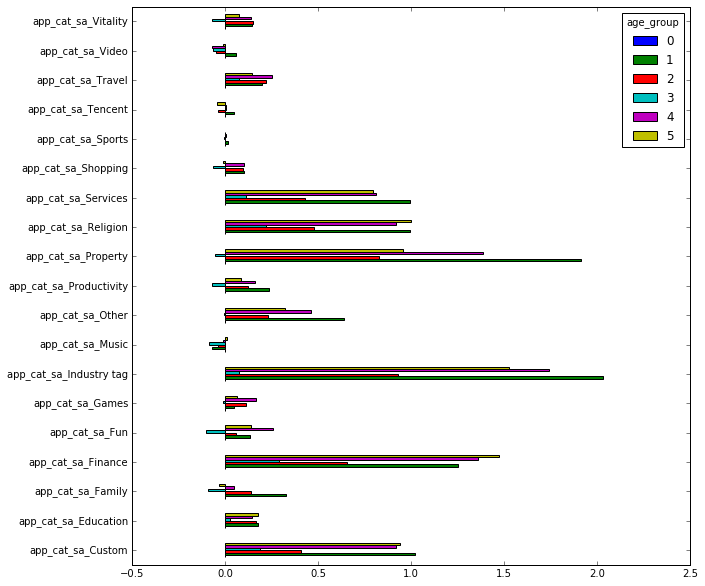

In [88]:
diff.groupby('age_group').mean()[sum_gender.columns[3:]].diff().T.plot(kind='barh', figsize=(10,10))